In [1]:
#allows the drive to be accessed
from google.colab import drive

drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import sys

!unzip -q "/content/drive/MyDrive/DP3B/Utilidades-TP4.zip"
!cat '/content/drive/MyDrive/DP3B/utils.py'
sys.path.append('/content/drive/MyDrive/DP3B')

replace Utilidades-TP4/Figures/neural_network.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: import sys
import numpy as np
from matplotlib import pyplot

def displayData(X, example_width=None, figsize=(10, 10)):
    """
    Displays 2D data stored in X in a nice grid.
    """
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):


In [4]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [5]:
#  training data stored in arrays X, y
data = loadmat(os.path.join('Utilidades-TP4/Data', 'ex4data1.mat'))
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in
# MATLAB where there is no index 0
y[y == 10] = 0

# Number of training examples
m = y.size

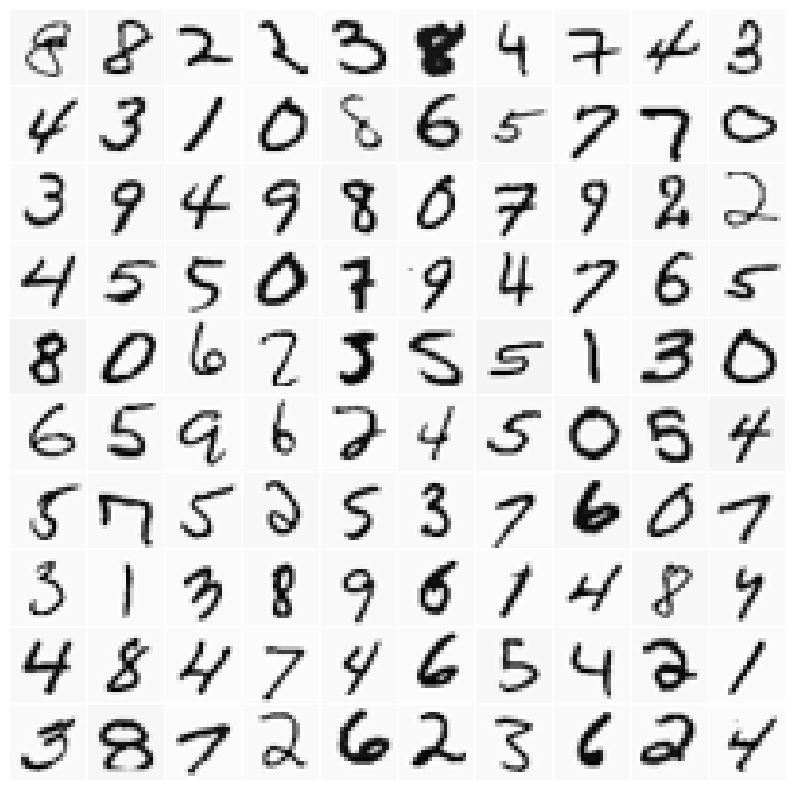

In [6]:
# Randomly select 100 data points to display
rand_indices = np.random.choice(m, 100, replace=False)
sel = X[rand_indices, :]

utils.displayData(sel)

In [7]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25   # 25 hidden units
num_labels = 10          # 10 labels, from 0 to 9

# Load the weights into variables Theta1 and Theta2
weights = loadmat(os.path.join('Utilidades-TP4/Data', 'ex4weights.mat'))

# Theta1 has size 25 x 401
# Theta2 has size 10 x 26
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

# swap first and last columns of Theta2, due to legacy from MATLAB indexing,
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

# Unroll parameters
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [8]:
def nnCostFunction(nn_params,
                   input_layer_size,
                   hidden_layer_size,
                   num_labels,
                   X, y, lambda_=0.0):
    """
    Implements the neural network cost function and gradient for a two layer neural
    network which performs classification.

    Parameters
    ----------
    nn_params : array_like
        The parameters for the neural network which are "unrolled" into
        a vector. This needs to be converted back into the weight matrices Theta1
        and Theta2.

    input_layer_size : int
        Number of features for the input layer.

    hidden_layer_size : int
        Number of hidden units in the second layer.

    num_labels : int
        Total number of labels, or equivalently number of units in output layer.

    X : array_like
        Input dataset. A matrix of shape (m x input_layer_size).

    y : array_like
        Dataset labels. A vector of shape (m,).

    lambda_ : float, optional
        Regularization parameter.

    Returns
    -------
    J : float
        The computed value for the cost function at the current weight values.

    grad : array_like
        An "unrolled" vector of the partial derivatives of the concatenatation of
        neural network weights Theta1 and Theta2.

    Instructions
    ------------
    You should complete the code by working through the following parts.

    - Part 1: Feedforward the neural network and return the cost in the
              variable J. After implementing Part 1, you can verify that your
              cost function computation is correct by verifying the cost
              computed in the following cell.

    - Part 2: Implement the backpropagation algorithm to compute the gradients
              Theta1_grad and Theta2_grad. You should return the partial derivatives of
              the cost function with respect to Theta1 and Theta2 in Theta1_grad and
              Theta2_grad, respectively. After implementing Part 2, you can check
              that your implementation is correct by running checkNNGradients provided
              in the utils.py module.

              Note: The vector y passed into the function is a vector of labels
                    containing values from 0..K-1. You need to map this vector into a
                    binary vector of 1's and 0's to be used with the neural network
                    cost function.

              Hint: We recommend implementing backpropagation using a for-loop
                    over the training examples if you are implementing it for the
                    first time.

    - Part 3: Implement regularization with the cost function and gradients.

              Hint: You can implement this around the code for
                    backpropagation. That is, you can compute the gradients for
                    the regularization separately and then add them to Theta1_grad
                    and Theta2_grad from Part 2.

    Note
    ----
    We have provided an implementation for the sigmoid function in the file
    `utils.py` accompanying this assignment.
    """
    # Reshape nn_params back into the parameters Theta1 and Theta2, the weight matrices
    # for our 2 layer neural network
    Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                        (hidden_layer_size, (input_layer_size + 1)))

    Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                        (num_labels, (hidden_layer_size + 1)))

    # Setup some useful variables
    m = y.size

    # You need to return the following variables correctly
    J = 0
    Theta1_grad = np.zeros(Theta1.shape)
    Theta2_grad = np.zeros(Theta2.shape)

    # ====================== YOUR CODE HERE ======================
    X = np.hstack((np.ones((m, 1)), X))
    a1 = X

    z2 = np.dot(a1, Theta1.T)
    a2 = utils.sigmoid(z2)
    a2 = np.hstack((np.ones((a2.shape[0], 1)), a2))

    z3 = np.dot(a2, Theta2.T)
    a3 = utils.sigmoid(z3)

    y_mtrx = np.eye(num_labels)[y]
    reg_term = (lambda_/(2*m))*(np.sum(np.square(Theta1[:, 1:])) + np.sum(np.square(Theta2[:, 1:])))
    J = (1/m)*np.sum(-y_mtrx*np.log(a3) - (1-y_mtrx)*np.log(1-a3))
    J += reg_term

    delta_3 = a3 - y_mtrx
    delta_2 = np.dot(delta_3, Theta2[:, 1:])*sigmoidGradient(z2)
    Delta1 = np.dot(delta_2.T, a1)
    Delta2 = np.dot(delta_3.T, a2)

    Theta1_grad = (1/m)*Delta1
    Theta2_grad = (1/m)*Delta2

    Theta1_grad[:, 1:] += (lambda_/m)*Theta1[:, 1:]
    Theta2_grad[:, 1:] += (lambda_/m)*Theta2[:, 1:]
    # ============================================================
    # Unroll gradients
    grad = np.concatenate([Theta1_grad.ravel(), Theta2_grad.ravel()])

    return J, grad

In [12]:
lambda_ = 0
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                   num_labels, X, y, lambda_)
print('Cost at parameters (loaded from ex4weights): %.6f ' % J)
print('The cost should be about                   : 0.287629.')

Cost at parameters (loaded from ex4weights): 0.287629 
The cost should be about                   : 0.287629.


In [13]:
# Weight regularization parameter (we set this to 1 here).
lambda_ = 1
J, _ = nnCostFunction(nn_params, input_layer_size, hidden_layer_size,
                      num_labels, X, y, lambda_)

print('Custo para os parâmetros (carregados de ex4weights): %.6f' % J)
print('Este valor deve ser por volta de                   : 0.383770.')

Custo para os parâmetros (carregados de ex4weights): 0.383770
Este valor deve ser por volta de                   : 0.383770.


In [11]:
def sigmoidGradient(z):
    """
    Computes the gradient of the sigmoid function evaluated at z.
    This should work regardless if z is a matrix or a vector.
    In particular, if z is a vector or matrix, you should return
    the gradient for each element.

    Parameters
    ----------
    z : array_like
        A vector or matrix as input to the sigmoid function.

    Returns
    --------
    g : array_like
        Gradient of the sigmoid function. Has the same shape as z.

    Instructions
    ------------
    Compute the gradient of the sigmoid function evaluated at
    each value of z (z can be a matrix, vector or scalar).

    Note
    ----
    We have provided an implementation of the sigmoid function
    in `utils.py` file accompanying this assignment.
    """

    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================
    g = utils.sigmoid(z)
    g = g*(1 - g)

    # ============================================================
    return g

In [14]:
z = np.array([-1, -0.5, 0, 0.5, 1])
g = sigmoidGradient(z)
print('Sigmoid gradient avaliado em [-1 -0.5 0 0.5 1]:\n  ')
print(g)

Sigmoid gradient avaliado em [-1 -0.5 0 0.5 1]:
  
[0.19661193 0.23500371 0.25       0.23500371 0.19661193]


In [15]:
def randInitializeWeights(L_in, L_out, epsilon_init=0.12):
    """
    Randomly initialize the weights of a layer in a neural network.

    Parameters
    ----------
    L_in : int
        Number of incomming connections.

    L_out : int
        Number of outgoing connections.

    epsilon_init : float, optional
        Range of values which the weight can take from a uniform
        distribution.

    Returns
    -------
    W : array_like
        The weight initialiatized to random values.  Note that W should
        be set to a matrix of size(L_out, 1 + L_in) as
        the first column of W handles the "bias" terms.

    Instructions
    ------------
    Initialize W randomly so that we break the symmetry while training
    the neural network. Note that the first column of W corresponds
    to the parameters for the bias unit.
    """

    # You need to return the following variables correctly
    W = np.zeros((L_out, 1 + L_in))

    # ====================== YOUR CODE HERE ======================
    W = np.random.rand(L_out, 1 + L_in) * 2 * epsilon_init - epsilon_init

    # ============================================================
    return W

In [16]:
print('Inicializando os parâmetros da rede neural...')

initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size)
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels)

# Unroll parameters
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

Inicializando os parâmetros da rede neural...


In [17]:
utils.checkNNGradients(nnCostFunction)

[[-9.27825235e-03 -9.27825236e-03]
 [-3.04978709e-06 -3.04978914e-06]
 [-1.75060084e-04 -1.75060082e-04]
 [-9.62660640e-05 -9.62660620e-05]
 [ 8.89911959e-03  8.89911960e-03]
 [ 1.42869450e-05  1.42869443e-05]
 [ 2.33146358e-04  2.33146357e-04]
 [ 1.17982666e-04  1.17982666e-04]
 [-8.36010761e-03 -8.36010762e-03]
 [-2.59383093e-05 -2.59383100e-05]
 [-2.87468729e-04 -2.87468729e-04]
 [-1.37149709e-04 -1.37149706e-04]
 [ 7.62813550e-03  7.62813551e-03]
 [ 3.69883257e-05  3.69883234e-05]
 [ 3.35320351e-04  3.35320347e-04]
 [ 1.53247082e-04  1.53247082e-04]
 [-6.74798369e-03 -6.74798370e-03]
 [-4.68759764e-05 -4.68759769e-05]
 [-3.76215583e-04 -3.76215587e-04]
 [-1.66560294e-04 -1.66560294e-04]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.64090819e-01  1.64090819e-01]
 [ 1.64567932e-01  1.64567932e-01]
 [ 1.58339334e-01  1.58339334e-01]
 [ 1.51127527e-01  1.51127527e-01]
 [ 1.49568335e-01  1.49568335e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 5.75736494e-02  5.75736493e-02]
 [ 5.77867378e-02  5

In [18]:
#  Check gradients by running checkNNGradients
lambda_ = 3
utils.checkNNGradients(nnCostFunction, lambda_)

# Also output the costFunction debugging values
debug_J, _  = nnCostFunction(nn_params, input_layer_size,
                          hidden_layer_size, num_labels, X, y, lambda_)

print('\n\nCost at (fixed) debugging parameters (w/ lambda = %f): %f ' % (lambda_, debug_J))
print('(for lambda = 3, this value should be about 0.576051)')

[[-9.27825235e-03 -9.27825236e-03]
 [-1.67679797e-02 -1.67679797e-02]
 [-6.01744725e-02 -6.01744725e-02]
 [-1.73704651e-02 -1.73704651e-02]
 [ 8.89911959e-03  8.89911960e-03]
 [ 3.94334829e-02  3.94334829e-02]
 [-3.19612287e-02 -3.19612287e-02]
 [-5.75658668e-02 -5.75658668e-02]
 [-8.36010761e-03 -8.36010762e-03]
 [ 5.93355565e-02  5.93355565e-02]
 [ 2.49225535e-02  2.49225535e-02]
 [-4.51963845e-02 -4.51963845e-02]
 [ 7.62813550e-03  7.62813551e-03]
 [ 2.47640974e-02  2.47640974e-02]
 [ 5.97717617e-02  5.97717617e-02]
 [ 9.14587966e-03  9.14587966e-03]
 [-6.74798369e-03 -6.74798370e-03]
 [-3.26881426e-02 -3.26881426e-02]
 [ 3.86410548e-02  3.86410548e-02]
 [ 5.46101547e-02  5.46101547e-02]
 [ 3.14544970e-01  3.14544970e-01]
 [ 1.18682669e-01  1.18682669e-01]
 [ 2.03987128e-01  2.03987128e-01]
 [ 1.25698067e-01  1.25698067e-01]
 [ 1.76337550e-01  1.76337550e-01]
 [ 1.32294136e-01  1.32294136e-01]
 [ 1.11056588e-01  1.11056588e-01]
 [ 3.81928689e-05  3.81928696e-05]
 [ 1.17148233e-01  1

In [34]:
#  After you have completed the assignment, change the maxiter to a larger
#  value to see how more training helps.
options= {'maxfun': 100}

#  You should also try different values of lambda
lambda_ = 1

# Create "short hand" for the cost function to be minimized
costFunction = lambda p: nnCostFunction(p, input_layer_size,
                                        hidden_layer_size,
                                        num_labels, X, y, lambda_)

# Now, costFunction is a function that takes in only one argument
# (the neural network parameters)
res = optimize.minimize(costFunction,
                        initial_nn_params,
                        jac=True,
                        method='TNC',
                        options=options)

# get the solution of the optimization
nn_params = res.x

# Obtain Theta1 and Theta2 back from nn_params
Theta1 = np.reshape(nn_params[:hidden_layer_size * (input_layer_size + 1)],
                    (hidden_layer_size, (input_layer_size + 1)))

Theta2 = np.reshape(nn_params[(hidden_layer_size * (input_layer_size + 1)):],
                    (num_labels, (hidden_layer_size + 1)))

In [31]:
pred = utils.predict(Theta1, Theta2, X)
print('Acurácia de treinamento: %f' % (np.mean(pred == y) * 100))

Acurácia de treinamento: 95.340000


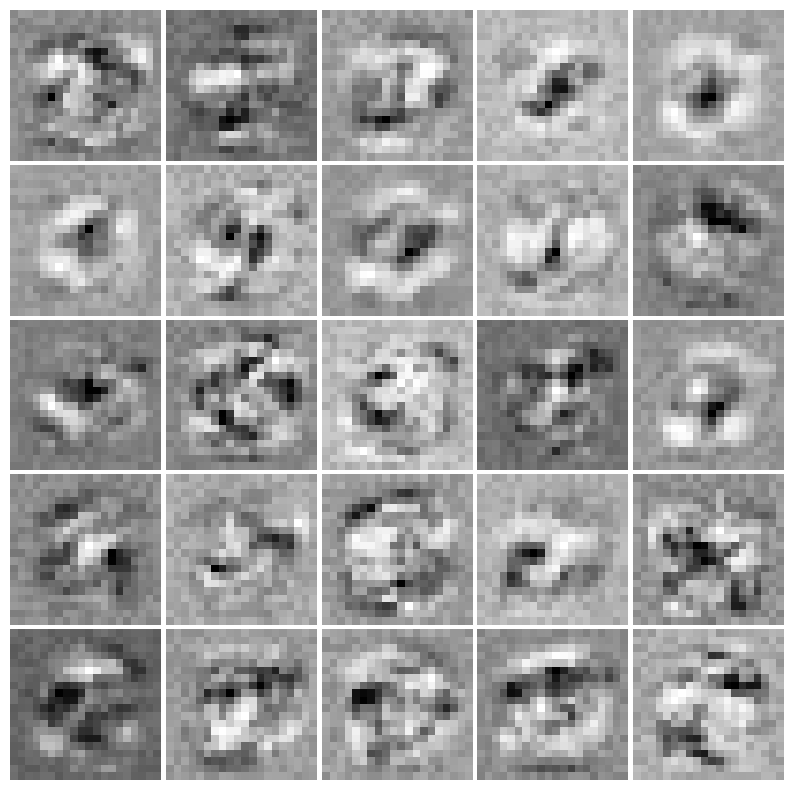

In [35]:
utils.displayData(Theta1[:, 1:])

In [36]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [37]:
class NeuralNetwork(torch.nn.Module):
    def __init__(self):
        #The super() builtin returns a proxy object (temporary object of the superclass) that allows us to access methods of the base class.
        super().__init__()
        #fc1 and fc2 will be our layers
        self.fc1 = torch.nn.Linear(in_features=400, out_features=25, bias=True)
        self.fc2 = torch.nn.Linear(in_features=25, out_features=10, bias=True)
    def forward(self, out):
        # foward() will perform linear activation on each layer
        out = torch.sigmoid(self.fc1(out))
        out = torch.sigmoid(self.fc2(out))
        return out

In [38]:
# Import the data
datas = loadmat('Utilidades-TP4/Data/ex4data1.mat')
datas.keys()

label, images = datas['y'], datas['X']
# This is an artifact due to the fact that this dataset was used in
# MATLAB where there is no index 0
label = label - 1

In [39]:
# Transform the inputs and labels into tensors
tensor_images, tensor_label = torch.Tensor(images), torch.LongTensor(label)

In [40]:
# Batch Size
batch_size = 35

# Creating the dataset with the two tensors
dataset = TensorDataset(tensor_images, tensor_label)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [41]:
# Instantiate the NN into variable model
model = NeuralNetwork()

# Definition of cost function
criterion = torch.nn.CrossEntropyLoss()

# Definition of SGD as optimizer algorithm and its parameter sets
optimizer = torch.optim.SGD(model.parameters(), lr=0.5, momentum=0.9)

In [42]:
print(model)

NeuralNetwork(
  (fc1): Linear(in_features=400, out_features=25, bias=True)
  (fc2): Linear(in_features=25, out_features=10, bias=True)
)


In [126]:
def training(NN, dataloader, criterion, lr=0.5):
    """
    Train the neural network to improve the predictions and, consequently,
    the accuracy os the model.

    Parameters
    ----------
    NN : class_like
        A class that contains the structure of neural network.

    dataloader: class_like
        A class that contains the training data set with images and labels.

    criterion: class_like
        A class that contains the cost function.

    lr: float_like
        The number of the learning rate. By default, it is equal to 0.5.

    Returns
    --------
    costs : list_like
        List of cost function values ​​for each epoch.

    accs : list_like
        List of accuracy values for each epoch.

    Instructions
    ------------
    Train the network using the functions of the Pytorch library.

    Note
    ----
    We provide the implementation of the accuracy computation,
    as well as the construction of the lists costs and accs.
    """

    # Recreates the model and the optimizer to ensure that we will not train an already trained model.
    model = NN
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.9)

    # Define the number os epochs.
    num_epochs = 100

    # Creation of variables to save train data
    cost = torch.zeros([])
    output = torch.zeros(batch_size,10)
    costs = []
    accs = []

    # Loop that will run the code num_epoch times
    for epoch in range(num_epochs):
        #Variables to calculate accuracy
        correct = 0
        total = 0
        cost = 0
        # Indicate that model is on train mode
        model.train()
        for data,label in dataloader:

            # ====================== YOUR CODE HERE ======================
            optimizer.zero_grad()
            output = model(data)
            label = label.view(-1)
            loss = criterion(output, label)
            loss.backward()
            optimizer.step()
            cost += loss.item()

            # ============================================================

            # Counting of correct labels and total examples
            out2 = (torch.log_softmax(output,dim=1))
            _,predict = torch.max(out2, dim = 1)
            for i in range(0,len(label)):
              total = total + 1
              if predict[i] == label[i]:
                correct = correct + 1

        # Computation of accuracy
        acc = (correct/total)*100 #Calcula a acurácia para erro absoluto de 1 grau em porcentagem

        # Adding elements to lists
        accs.append(acc) #Adiciona essa acurácia a sua lista
        costs.append(cost / len(dataloader))

        print('epoch [{}/{}], cost:{:.4f}'.format(epoch + 1, num_epochs, cost / len(dataloader)))

    return costs, accs

In [127]:
costs, accs = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion)

epoch [1/100], cost:1.9105
epoch [2/100], cost:1.6395
epoch [3/100], cost:1.5972
epoch [4/100], cost:1.5755
epoch [5/100], cost:1.5624
epoch [6/100], cost:1.5536
epoch [7/100], cost:1.5456
epoch [8/100], cost:1.5385
epoch [9/100], cost:1.5316
epoch [10/100], cost:1.5269
epoch [11/100], cost:1.5228
epoch [12/100], cost:1.5201
epoch [13/100], cost:1.5168
epoch [14/100], cost:1.5143
epoch [15/100], cost:1.5121
epoch [16/100], cost:1.5108
epoch [17/100], cost:1.5085
epoch [18/100], cost:1.5065
epoch [19/100], cost:1.5056
epoch [20/100], cost:1.5043
epoch [21/100], cost:1.5028
epoch [22/100], cost:1.5023
epoch [23/100], cost:1.5003
epoch [24/100], cost:1.4994
epoch [25/100], cost:1.4986
epoch [26/100], cost:1.4980
epoch [27/100], cost:1.4972
epoch [28/100], cost:1.4964
epoch [29/100], cost:1.4955
epoch [30/100], cost:1.4949
epoch [31/100], cost:1.4940
epoch [32/100], cost:1.4936
epoch [33/100], cost:1.4926
epoch [34/100], cost:1.4920
epoch [35/100], cost:1.4914
epoch [36/100], cost:1.4912
e

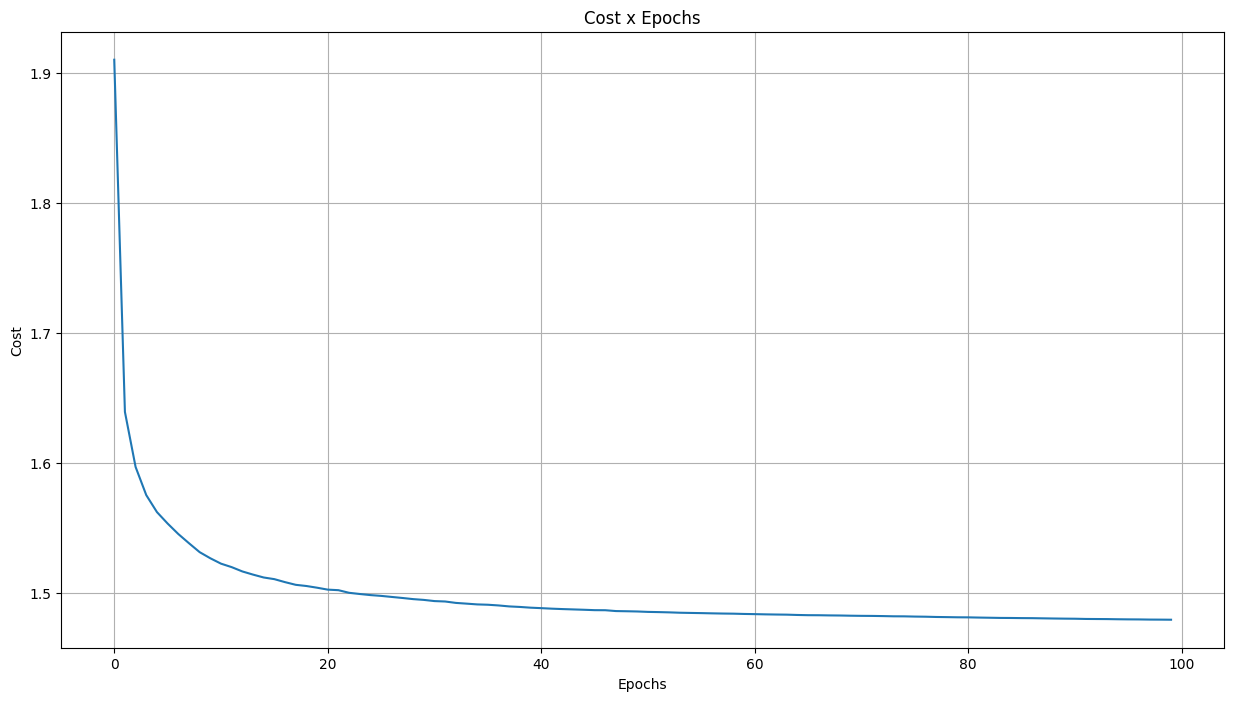

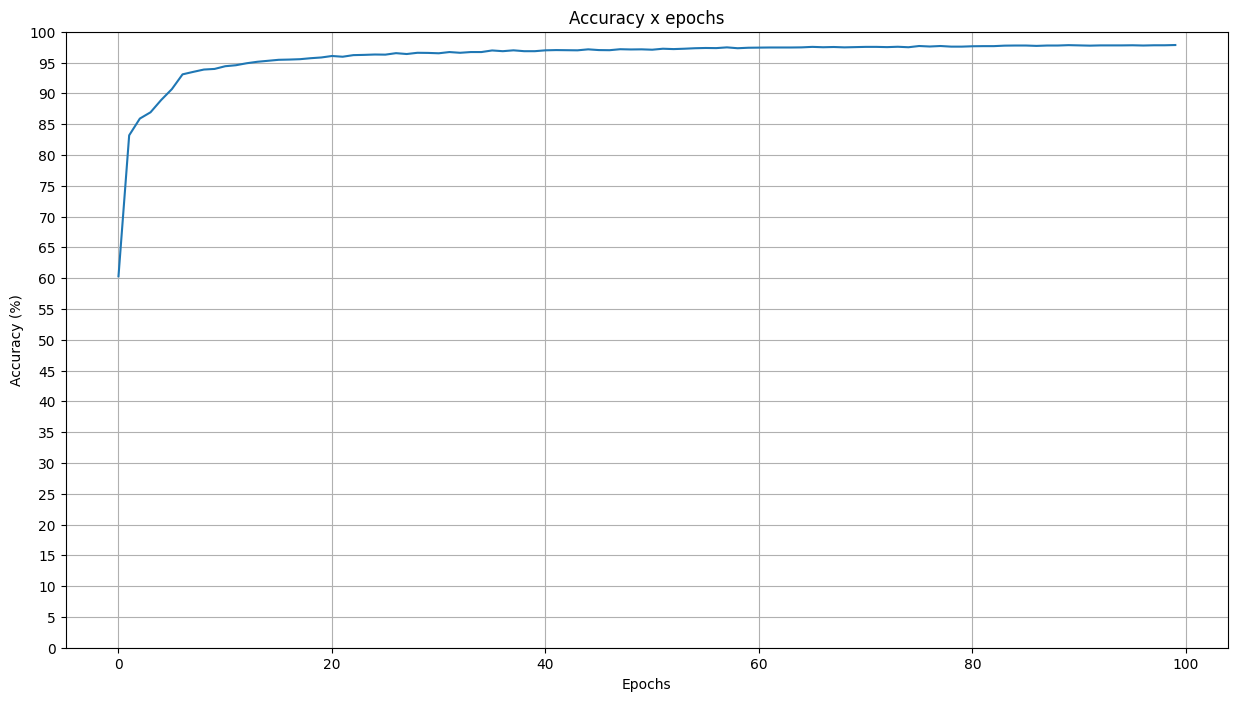

In [128]:
pyplot.figure(figsize=(15,8))
pyplot.plot(costs)
pyplot.title('Cost x Epochs')
pyplot.xlabel('Epochs')
pyplot.ylabel('Cost')
pyplot.grid(True)
pyplot.show()

pyplot.figure(figsize=(15,8))
pyplot.plot(accs)
pyplot.yticks(range(0,101,5))
pyplot.title('Accuracy x epochs')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy (%)')
pyplot.grid(True)
pyplot.show()


In [129]:
costs_lr0005, accs_lr0005 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 0.005)
costs_lr0015, accs_lr0015 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 0.015)
costs_lr15, accs_lr15 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 15)
costs_lr50, accs_lr50 = training(NN=NeuralNetwork(), dataloader=dataloader, criterion=criterion, lr = 50)

epoch [1/100], cost:2.3032
epoch [2/100], cost:2.2970
epoch [3/100], cost:2.2907
epoch [4/100], cost:2.2838
epoch [5/100], cost:2.2758
epoch [6/100], cost:2.2664
epoch [7/100], cost:2.2551
epoch [8/100], cost:2.2417
epoch [9/100], cost:2.2259
epoch [10/100], cost:2.2081
epoch [11/100], cost:2.1882
epoch [12/100], cost:2.1667
epoch [13/100], cost:2.1440
epoch [14/100], cost:2.1208
epoch [15/100], cost:2.0975
epoch [16/100], cost:2.0747
epoch [17/100], cost:2.0526
epoch [18/100], cost:2.0317
epoch [19/100], cost:2.0120
epoch [20/100], cost:1.9937
epoch [21/100], cost:1.9767
epoch [22/100], cost:1.9609
epoch [23/100], cost:1.9463
epoch [24/100], cost:1.9327
epoch [25/100], cost:1.9202
epoch [26/100], cost:1.9085
epoch [27/100], cost:1.8976
epoch [28/100], cost:1.8874
epoch [29/100], cost:1.8779
epoch [30/100], cost:1.8691
epoch [31/100], cost:1.8606
epoch [32/100], cost:1.8527
epoch [33/100], cost:1.8451
epoch [34/100], cost:1.8381
epoch [35/100], cost:1.8312
epoch [36/100], cost:1.8248
e

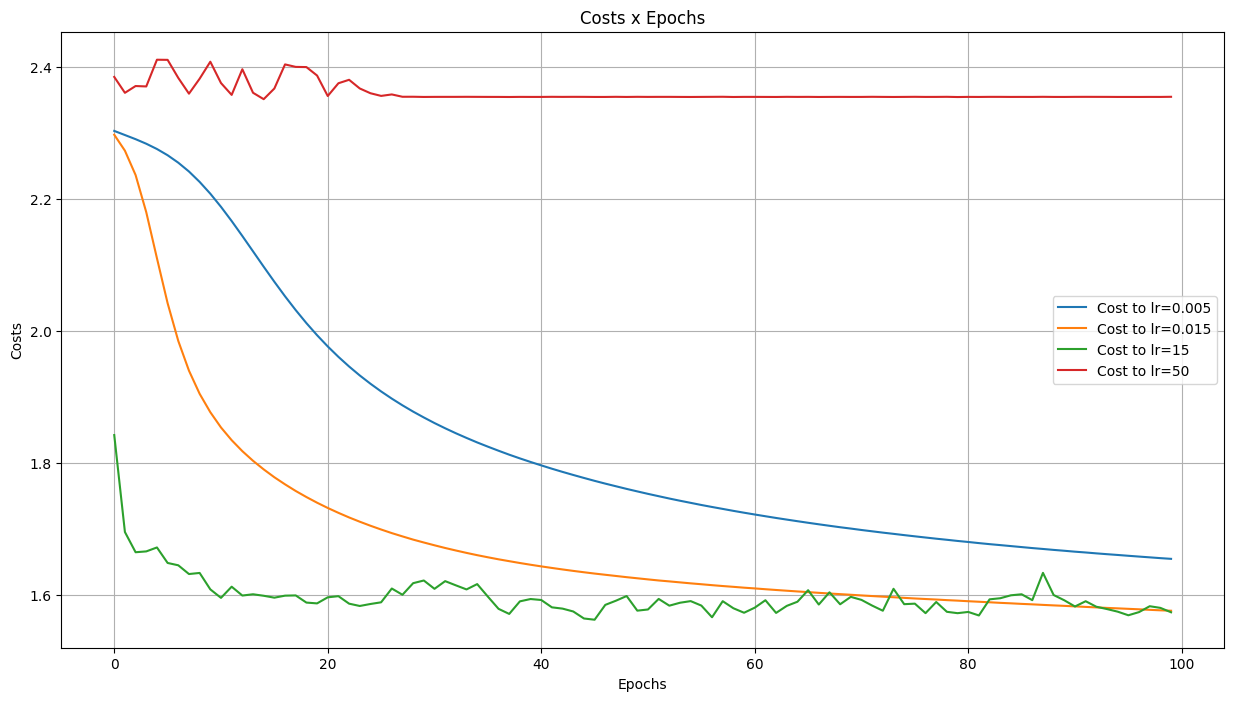

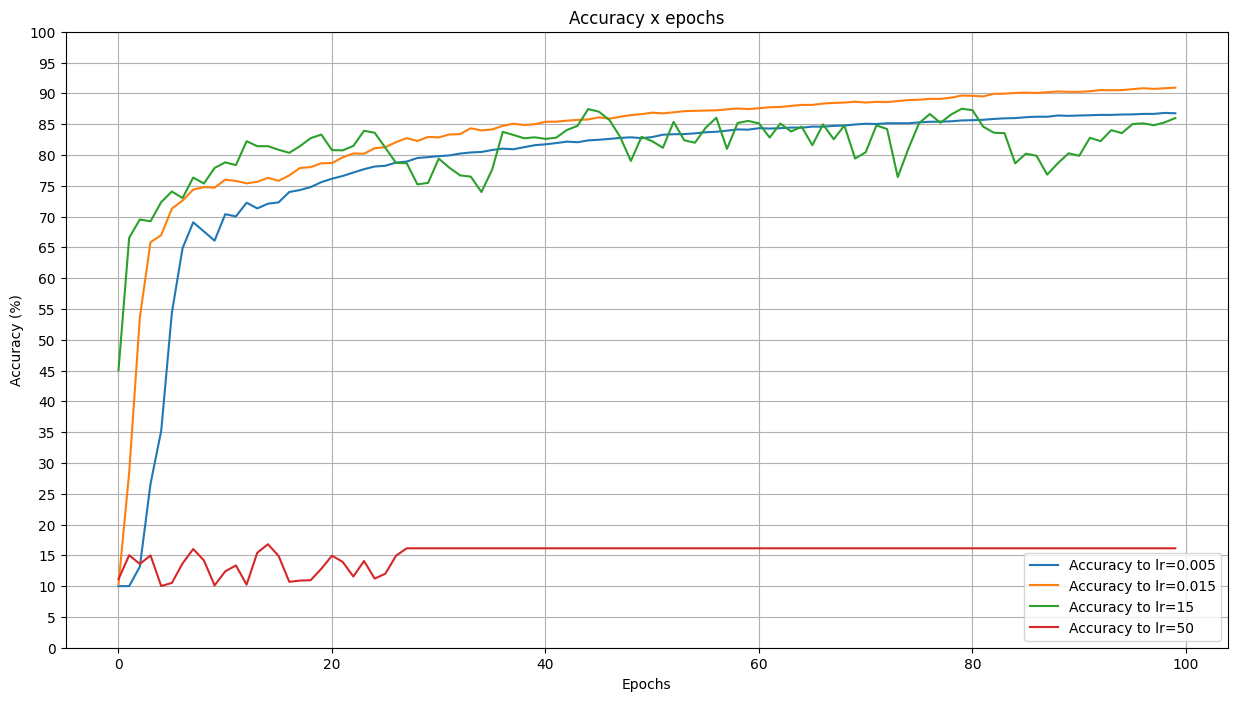

In [130]:
pyplot.figure(figsize=(15,8))
pyplot.plot(costs_lr0005, label='Cost to lr=0.005')
pyplot.plot(costs_lr0015, label='Cost to lr=0.015')
pyplot.plot(costs_lr15, label='Cost to lr=15')
pyplot.plot(costs_lr50, label='Cost to lr=50')
pyplot.title('Costs x Epochs')
pyplot.xlabel('Epochs')
pyplot.ylabel('Costs')
pyplot.legend()
pyplot.grid(True)
pyplot.show()

pyplot.figure(figsize=(15,8))
pyplot.plot(accs_lr0005, label='Accuracy to lr=0.005')
pyplot.plot(accs_lr0015, label='Accuracy to lr=0.015')
pyplot.plot(accs_lr15, label='Accuracy to lr=15')
pyplot.plot(accs_lr50, label='Accuracy to lr=50')
pyplot.yticks(range(0,101,5))
pyplot.title('Accuracy x epochs')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy (%)')
pyplot.legend(loc='lower right')
pyplot.grid(True)
pyplot.show()